# Module 12 - Bayesian Optimisation

**Important** It specifically says at the start "Bayesian optimisation, which is a technique you will use frequently for the programme’s capstone competition. In particular, you will assess the trade-offs between continued exploration and exploitation. You’ll also learn more information on the details of the capstone project and reflect on your strategy for participating in the competition."

## Module Overview

- Evaluate and select common machine learning methods to improve predictive performance and refine decision-making strategies.
- Analyse a complex data set using a machine learning model to extract value from the data that will help organisations make performance-based decisions.
- Develop and refine machine learning models, using Python and industry-standard tools to measure and improve performance.

## Learning outcomes

- LO1: Identify the parameters in machine learning algorithms and the most common surrogate methods used for tuning.
- LO 2: Represent exploration and exploitation in Bayesian optimisation.
- LO 3: Analyse the trade-offs between exploration and exploitation for specific applications.
- LO 4: Determine when continued parameter tuning is no longer worthwhile.
- LO 5: Describe the purpose of using surrogate models, their applications and common pitfalls.
- LO 6: Identify a codebase for machine learning competitions.

## Misc and Keywords
- **Gaussian Process (GP)** generalises a normal distribution to an infinite number of dimensions
- A **normal distribution** (also called a Gaussian) describes uncertainty for a single number. For example, if we measure a person’s height, we might say it follows a normal distribution with a mean (average) of 170 cm and some spread (variance).
- A **Gaussian Process (GP)** extends this idea to functions instead of single numbers. Instead of just predicting a single point, it predicts a whole smooth curve that fits the data along with uncertainty bands around it.

## Module Summary Description

---

## Introduction
**Bayesian Optimisation** is a strategy for optimising expensive-to-evaluate functions, particularly when function evaluations are costly, time-consuming, or limited in number. It is especially useful for black-box functions where gradients are unavailable or difficult to compute.  

Bayesian Optimisation relies on building a probabilistic model of the objective function, often using a **Gaussian Process (GP)** as a surrogate model. This model estimates the function's behavior and guides the selection of the next evaluation point to maximise improvement.

One of the most important decisions in Bayesian optimisation is which surrogate model to use

When using Bayesian Optimisation, it is often recommended to reformulate the problem such that the function has a **prior mean of zero**. This assumption simplifies the Gaussian Process model, ensuring that without data, the expected function behavior is centered around zero.

## Steps to Ensure a Prior Mean of Zero in Bayesian Optimisation

### **1. Center the Function Outputs (Normalisation)**
   - If you have prior knowledge about the function (e.g., previous evaluations), you can subtract the empirical mean.
   - Given a set of function evaluations $y_1, y_2, \dots, y_n$, compute the empirical mean:

     $$
     \mu = \frac{1}{n} \sum_{i=1}^{n} y_i
     $$

   - Transform the function:

     $$
     \tilde{f}(x) = f(x) - \mu
     $$

   - This ensures that the transformed function has an average value of zero over the observed data.

### **2. Choose an Appropriate Mean Function in the Gaussian Process**
   - In standard Gaussian Process (GP) regression, we define a prior mean function $m(x)$ such that:

     $$
     f(x) \sim \mathcal{GP}(m(x), k(x, x'))
     $$

   - If we set **$m(x) = 0$**, the GP will assume that, before observing data, the expected function values are centered at zero.
   - If the function has a known trend (e.g., increasing linearly), you may instead use a simple mean function like $m(x) = ax + b$, but for general cases, setting it to zero is common.

### **3. Standardise Function Values (Z-score Normalisation)**
   - Instead of just shifting the mean, it's often useful to scale the function values as well:

     $$
     \tilde{f}(x) = \frac{f(x) - \mu}{\sigma}
     $$

   - Where $\sigma$ is the standard deviation:

     $$
     \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \mu)^2}
     $$

   - This standardisation ensures that function values are on a consistent scale (typically between -1 and 1), which helps Gaussian Process models handle numerical stability better.

### **4. Reverse the Transformation After Optimisation**
   - Since we modified the function during optimisation, we need to **undo** this transformation when interpreting results:

     $$
     f^*(x) = \tilde{f}^*(x) \cdot \sigma + \mu
     $$

   - Where $f^*(x)$ is the final optimised function value.

### Limitations of Bayesian Optimisation
1. **Dimensionality**:
    - Computational cost grows significantly with the number of dimensions.
    - Bayesian Optimisation does not inherently provide gradient information, making it less effective for very high-dimensional problems.
    - It generally performs well for problems with fewer than **10 dimensions**. For higher dimensions, modifications such as **batch evaluations, trust region methods, or random embeddings** may be necessary.
2. **Choice of Surrogate Model**:
    - The effectiveness of Bayesian Optimisation depends on selecting a good surrogate model (often a Gaussian Process, but can also be a Tree-based method like Random Forests).
    - The model should approximate the underlying function well enough to guide optimisation efficiently.
3. **Numerical Challenges**:
    - The Gaussian Process model requires inverting large covariance matrices, which becomes computationally expensive as the dataset grows.
    - This matrix inversion has a complexity of $O(n^3)$, where $n$ is the number of function evaluations.
    - Approximate methods, such as **sparse Gaussian Processes** or **Bayesian Neural Networks**, can help mitigate this issue.


### Surrogate Models  
In many machine learning tasks, we need to tune hyperparameters, such as the **depth of a decision tree** or the **number of trees in an ensemble**. Evaluating every possible combination can be expensive, so we use a **surrogate model** to approximate the real function and guide the search.  

A **surrogate model** in Bayesian Optimisation acts as a **smart guessing tool** that predicts where to test next without performing costly evaluations.  

#### **Analogy**  
Imagine trying to find the perfect cake recipe. Baking each version is **time-consuming and expensive**. Instead, you track past attempts and use a **predictive model** to estimate how good a new recipe might be before actually baking it.  

This **predictive model** is the **surrogate model**—a stand-in that helps decide which recipes are worth testing next.  

### **Types of Surrogate Models in Bayesian Optimisation**  
Different types of surrogate models can be used, including:  
- **Gaussian Processes**  
- **Regression Trees**  
- **Stochastic Processes**  
- **Other Regression Functions**  

#### **Gaussian Process (GP)**  
A **Gaussian Process** not only predicts possible function values but also estimates **uncertainty** in its predictions. This helps decide whether to **explore new areas** or **refine promising ones**. Mathematically, a GP models a function as:  

$$ f(x) \sim \mathcal{GP}(m(x), k(x, x')) $$  

where:  
- \( m(x) \) is the **mean function** (often set to 0).  
- \( k(x, x') \) is the **covariance (kernel) function**, which defines how points are related.  

#### **Regression Trees**  
Regression trees model the function by partitioning the input space into **regions** and assigning a constant prediction to each. They are useful for **piecewise approximations** and can be combined in ensembles (e.g., Random Forests, XGBoost).  

#### **Stochastic Processes**  
Stochastic processes extend Gaussian Processes by considering **random fluctuations** over time or space. These models are useful when the function being optimised changes dynamically.  

#### **Regression Functions**  
Simple regression models (e.g., **linear regression, polynomial regression**) can act as surrogates, providing a rough approximation of the objective function when a more complex model is unnecessary.  


### Surrogate models
The goal of surrogate models is develop a mean function, $\mu_{GP}$, that closely represents the actual unknown function, and an uncertainty function or variance, $\sigma_{GP}$,  

The mean function is based on the data we have evaluated (the instances and features)
The uncertainty function is based on inadequate data

There is uncertainty in the function that is farther away from the points that have been previously evaluated. A function is certain if it lies near points that have been previously evaluated.

#### Exploration vs Exploitation
In an explorative strategy, you would try to sample points where there is a high degree of uncertainty, while in an explotative strategy you would focus on points where there is a high degree of improvement.

So:
- Exploration looks at whether we should explore very different settings and how much we should explore
- Exploitation is looking at what worked well and then doing something similar to that

#### Acquisition function

You balance exploitation and exploration based on an acquisition function. The acquistion function mathematically captures the two goals of wanting to explore the space and/or exploit points that are close in value. The acquistion function has high values where it is very uncertain about the original function values. And is also very high where we think we might have found the optimum point. We can then focus on solely optimising, maximising, this activation function as opposed to the two indvidual functions of exploitation and exploration.

A typical process might be as follows
1. Generate surrogate model recapitulating the original function value
2. Evaluate surrogate model
3. Evaluate original function value
4. The value is captured in the new acquistion function
The process repeats, each time the acquisition function updates we evaluate a new point. Overtime the mathematical model and surrogate model will become more similar to one another

There are many acquisition functions available, and it is still an active area of research. One in particular is called the upper confidence bound.

$$^{\text{max}_\mu}Surrogate - ^{\kappa\sigma}Surrogate$$

where 
- $^{\text{max}_\mu}Surrogate$ is maximum value of the mean of the surrogate
- $^{\sigma}Surrogate$ Is the uncertainty in the surrogate function
- $\kappa$ is the parameter

#### When to Stop Parameter Tuning
At the point of diminishing returns
When the results start to flatline. It is often expected the first ~50 or so iterations will result in a noticable decrease in score, and then it starts to flatline.
If the function appears as a flat line from the beginning, then this is a surrogate model that you do not want to use for those classes.


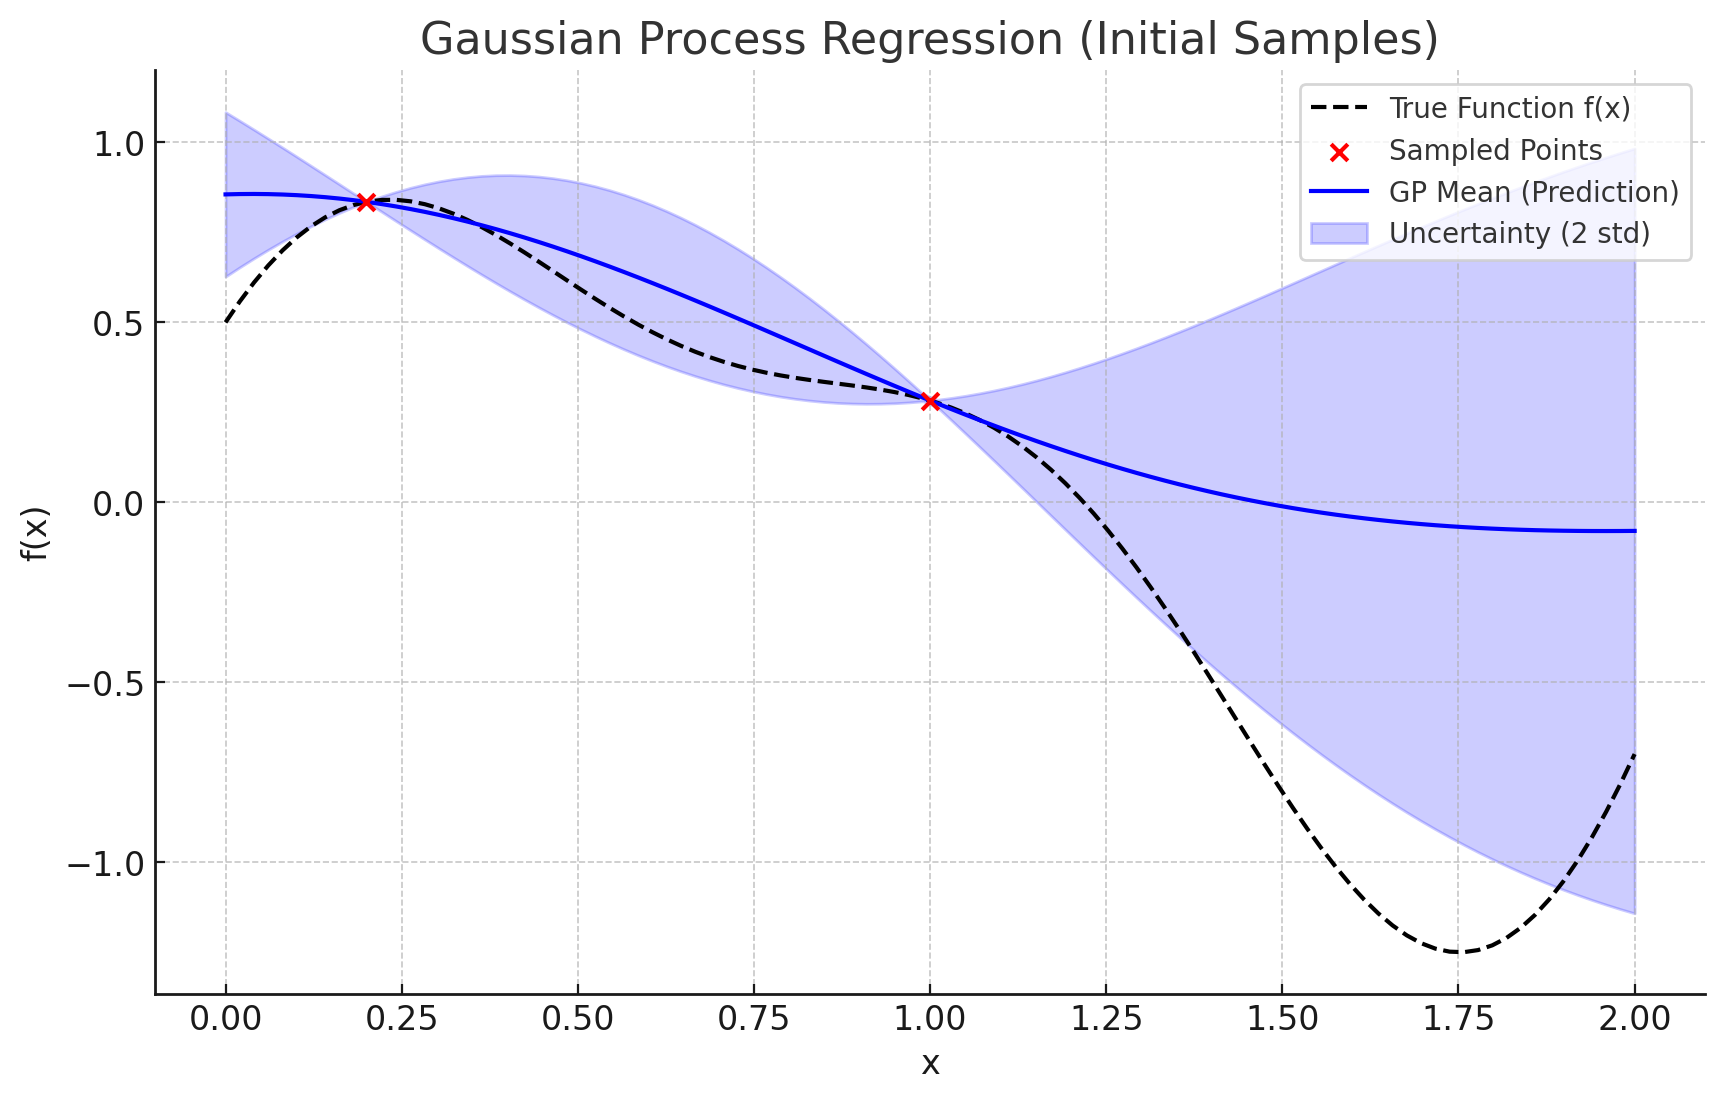